In [1]:
# scipy.integrate库提供了数值积分和常微分方程组求解算法odeint
# 用odeint计算洛仑兹吸引子的轨迹。洛仑兹吸引子由下面的三个微分方程定义
# http://old.sebug.net/paper/books/scipydoc/scipy_intro.html

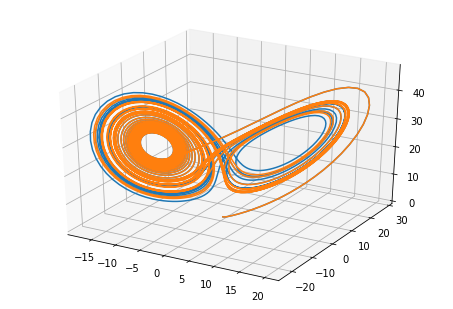

In [2]:
# 这三个方程定义了三维空间中各个坐标点上的速度矢量。
# 从某个坐标开始沿着速度矢量进行积分，就可以计算出无质量点在此空间中的运动轨迹。
# 其中 \sigma, \rho, \beta 为三个常数，不同的参数可以计算出不同的运动轨迹： x(t), y(t), z(t)。 
# 当参数为某些值时，轨迹出现馄饨现象：即微小的初值差别也会显著地影响运动轨迹。
# 洛仑兹吸引子的轨迹计算和绘制程序：
from scipy.integrate import odeint
import numpy as np

def lorenz(w, t, p, r, b):
    # 给出位置矢量w，及三个参数p，r，b计算出 dx/dt, dy/dt, dz/dt的值 -> 链接中的三个公式
    x, y, z = w
    # 直接与lorenz的计算公式对应 -> 链接公式
    return np.array([p * (y - x), x * (r - z) - y, x * y - b * z])

# 创建时间点
t = np.arange(0, 30, 0.01)
# 调用odeint 对 lorenz 进行求解， 用两个不同的初始值
track_1 = odeint(lorenz, (0.0, 1.00, 0.0), t, args=(10.0, 28.0, 3.0))
track_2 = odeint(lorenz, (0.0, 1.01, 0.0), t, args=(10.0, 28.0, 3.0))

# 绘图
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(track_1[:, 0], track_1[:, 1], track_1[:, 2])
ax.plot(track_2[:, 0], track_2[:, 1], track_2[:, 2])
plt.show()
# 用odeint函数对洛仑兹吸引子微分方程进行数值求解所得到的运动轨迹
# 即使初始值只相差0.01，两条运动轨迹也是完全不同的。
# 在程序中先定义一个lorenz函数，它的任务是计算出某个位置的各个方向的微分值，这个计算直接根据洛仑兹吸引子的公式得出。
# 然后调用odeint，对微分方程求解，odeint有许多参数，这里用到的四个参数分别为：
    # lorenz， 它是计算某个位移上的各个方向的速度(位移的微分)
    # (0.0, 1.0, 0.0)，位移初始值。计算常微分方程所需的各个变量的初始值
    # t， 表示时间的数组，odeint对于此数组中的每个时间点进行求解，得出所有时间点的位置
    # args， 这些参数直接传递给lorenz函数，因此它们都是常量